# Telco- Customer- Churn Prediction - Classification

## Data set Description:

Predict behavior to retain customers.Each row represents a customer, each column contains customer’s attributes
described on the column Metadata.
The raw data contains 7043 rows (customers) and 21 columns (features).
The “Churn” column is our target.


#### The data set includes information about:

| **Variable Name** | **Description** |
|--|--|
|customerID | The id of each customer|
|gender |Whether the customer is a male or a female |
|SeniorCitizen |Whether the customer is a senior citizen or not (1, 0) |
|Partner |Whether the customer has a partner or not (Yes, No) |
|Dependents |Whether the customer has dependents or not (Yes, No) |
|tenure |Number of months the customer has stayed with the company |
|PhoneService |Whether the customer has a phone service or not (Yes, No) |
|MultipleLines |Whether the customer has multiple lines or not (Yes, No, No phone service) |
|InternetService |Customer's internet service provider (DSL, Fiber optic, No) |
|OnlineSecurity |Whether the customer has online security or not (Yes, No, No internet service) |
|OnlineBackup |Whether the customer has online backup or not (Yes, No, No internet service) |
|DeviceProtection |Whether the customer has device protection or not (Yes, No, No internet service) |
|TechSupport |Whether the customer has tech support or not (Yes, No, No internet service) |
|StreamingTV |Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies |Whether the customer has streaming movies or not (Yes, No, No internet service) |
|Contract |The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling |Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod |The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges |The amount charged to the customer monthly|
|TotalCharges |The total amount charged to the customer|
|Churn |Whether the customer churned or not (Yes or No)|

### Goal:

our goal is to predict the number of customers left the company

In [391]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [392]:
# Importing the data
churn=pd.read_csv(r"C:\Users\srava\github projects\project on Telecom churn\WA_Fn-UseC_-Telco-Customer-Churn.csv")

### Exploratory Data Analysis(EDA)

In [393]:
churn.info()
# gives the information about the data set (no of rows,no of columns,column names,dtypes,non null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [394]:
churn.shape
# gives the no of rows and no of columns present in the data set

(7043, 21)

In [395]:
churn.head()
# getting top 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [396]:
churn.tail() # getting bottom 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [397]:
churn.describe() # using describe we can get "Count" ,"Mean","Median","Standard Deviation","First Quartile","Third Quartile"
# "Minimum Value" and "Max Value" of the variables

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [398]:
churn=churn.drop("customerID",axis=1) # dropping the customer id column 

In [399]:
churn.info() # gives the information about the data set (no of rows,no of columns,column names,dtypes,non null values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [558]:
# checking for null values
churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [562]:
# checking for nan values
churn.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [400]:
churn.gender.value_counts() # checking value counts of a column

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [401]:
churn.SeniorCitizen.value_counts() # checking value counts of a column

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [402]:
churn.SeniorCitizen=churn.SeniorCitizen.astype("object") # changing the data type of a column to object

In [403]:
churn.Partner.value_counts() # checking value counts of a column

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [404]:
churn.Dependents.value_counts() # checking value counts of a column

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [405]:
churn.PhoneService.value_counts() # checking value counts of a column

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [406]:
churn.MultipleLines.value_counts() # checking value counts of a column

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [407]:
churn.InternetService.value_counts() # checking value counts of a column

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [408]:
churn.OnlineSecurity.value_counts() # checking value counts of a column

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [409]:
churn.OnlineBackup.value_counts() # checking value counts of a column

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [410]:
churn.DeviceProtection.value_counts() # checking value counts of a column

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [411]:
churn.TechSupport.value_counts()# checking value counts of a column

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [412]:
churn.StreamingTV.value_counts()# checking value counts of a column

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [413]:
churn.StreamingMovies.value_counts() # checking value counts of a column

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [414]:
churn.Contract.value_counts() # checking value counts of a column

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [415]:
churn.PaperlessBilling.value_counts()# checking value counts of a column

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

In [416]:
churn.PaymentMethod.value_counts() # checking value counts of a column

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [417]:
churn.MonthlyCharges.value_counts()# checking value counts of a column

MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64

In [418]:
churn.TotalCharges.value_counts()# checking value counts of a column

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [419]:
churn.TotalCharges=pd.to_numeric(churn.TotalCharges,errors="coerce")
# changing the data type of a column to numeric

In [420]:
churn.TotalCharges.isnull().sum() # checking for null values

11

In [421]:
churn.TotalCharges.describe()  # using describe we can get "Count" ,"Mean","Median","Standard Deviation","First Quartile","Third Quartile"
# "Minimum Value" and "Max Value" of the variables

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [422]:
churn.TotalCharges=churn.TotalCharges.fillna(churn.TotalCharges.median())
# filling null values with median

In [423]:
churn.TotalCharges.isnull().sum() # checking null values after filling the them with median

0

In [424]:
churn.Churn.value_counts() # checking value counts of a column

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [425]:
# After changing the data types of the variables lets check the descriptive measures of the varaiables
churn.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [426]:
print("skewness: ",churn.tenure.skew())
print("Kurtosis: ",churn.tenure.kurt())
# checking the skewness and kurtosis of tenure

skewness:  0.2395397495619829
Kurtosis:  -1.387371635971685


In [427]:
print("skewness: ",churn.MonthlyCharges.skew())
print("Kurtosis: ",churn.MonthlyCharges.kurt())
# checking the skewness and kurtosis of MonthlyCharges

skewness:  -0.22052443394398033
Kurtosis:  -1.2572596945495056


In [428]:
print("skewness: ",churn.TotalCharges.skew())
print("Kurtosis: ",churn.TotalCharges.kurt())
# checking the skewness and kurtosis of TotalCharges

skewness:  0.9637890936414893
Kurtosis:  -0.22640031928829618


In [429]:
churn.describe(include="object") # describing the object columns

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


### Data visualization

<Figure size 3000x1500 with 0 Axes>

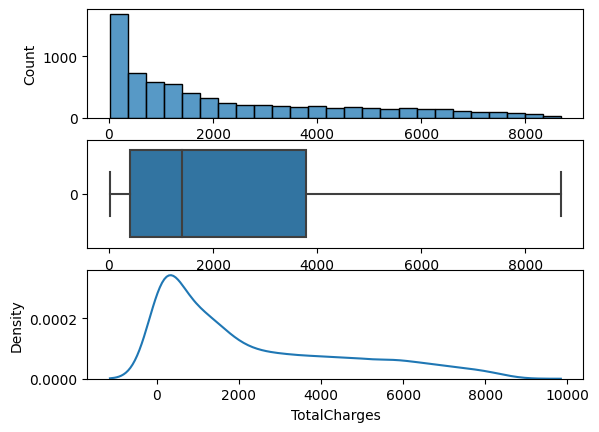

In [431]:
plt.figure(figsize=(30,15))
fog,ax=plt.subplots(3,1)
sns.histplot(churn.TotalCharges,ax=ax[0])
sns.boxplot(churn.TotalCharges,orient="h",ax=ax[1])
sns.kdeplot(churn.TotalCharges,ax=ax[2])
plt.show()

<Figure size 3000x1500 with 0 Axes>

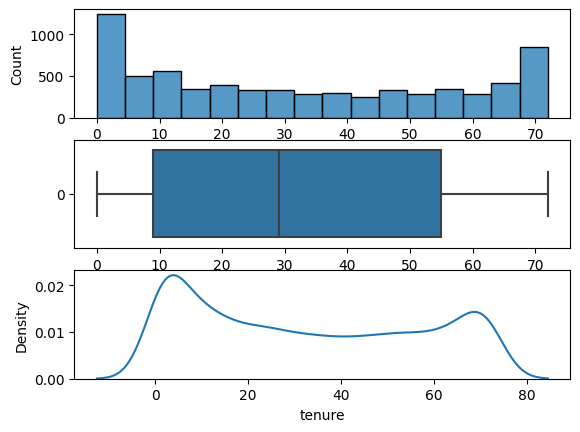

In [432]:
plt.figure(figsize=(30,15))
fog,ax=plt.subplots(3,1)
sns.histplot(churn.tenure,ax=ax[0])
sns.boxplot(churn.tenure,orient="h",ax=ax[1])
sns.kdeplot(churn.tenure,ax=ax[2])
plt.show()

<Axes: ylabel='Frequency'>

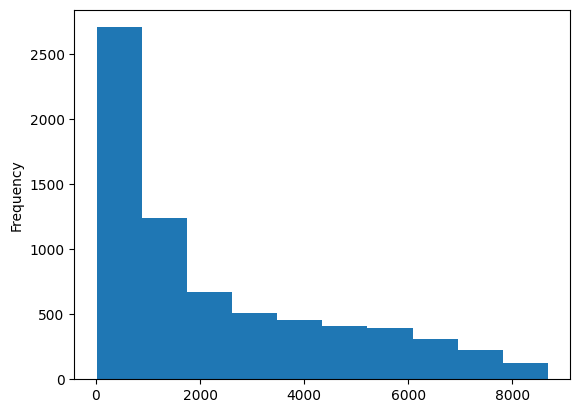

In [433]:
churn.TotalCharges.plot(kind="hist")

<Axes: ylabel='count'>

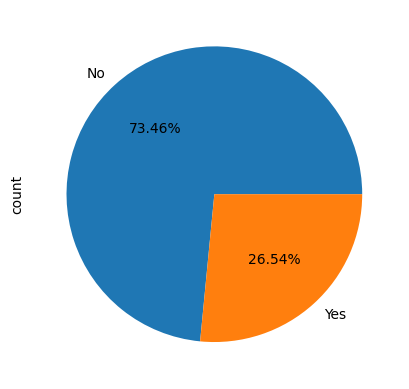

In [434]:
churn.Churn.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

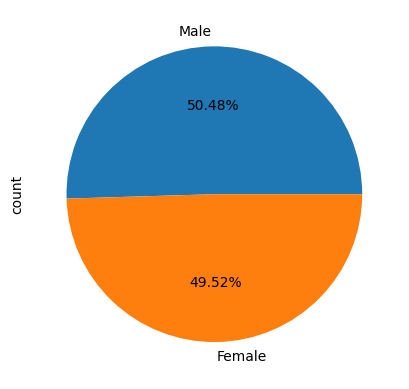

In [435]:
churn.gender.value_counts().plot(kind="pie",autopct="%.2f%%")

<Axes: ylabel='count'>

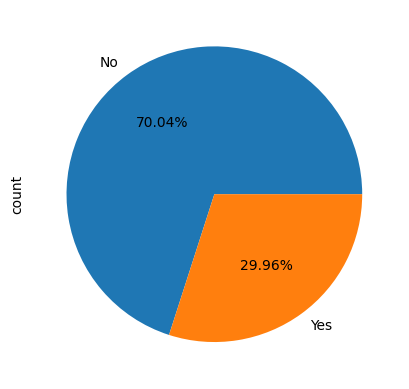

In [436]:
churn.Dependents.value_counts().plot(kind="pie",autopct="%.2f%%")

Cross Tabulation & Stacked Bar Plot- Churn & gender, Churn & Contract


<Axes: xlabel='Churn'>

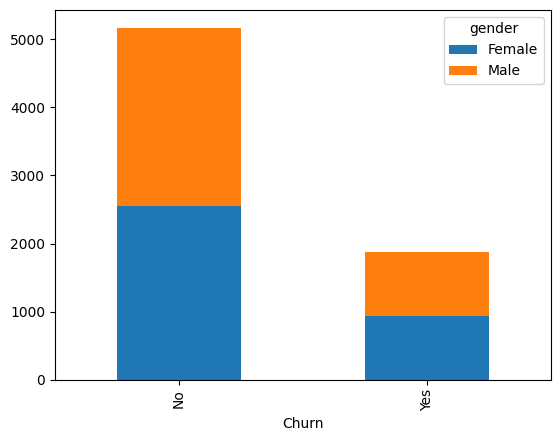

In [437]:
pd.crosstab(churn.Churn,churn.gender).plot(kind="bar",stacked=True)

<Axes: xlabel='Churn'>

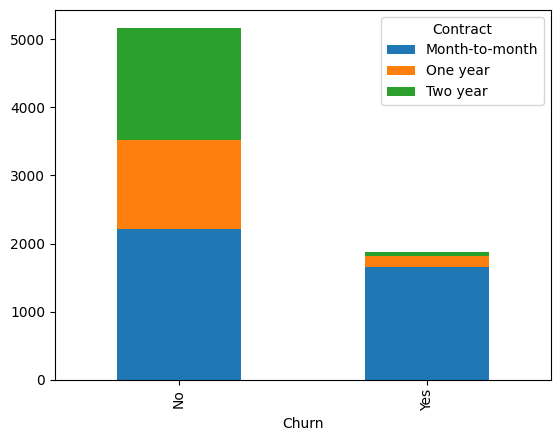

In [438]:
pd.crosstab(churn.Churn,churn.Contract).plot(kind="bar",stacked=True)

 groupby() - mean of following - tenure and gender, tenure and Contract,
 TotalCharges and InternetService, TotalCharges and PaymentMethod


In [439]:
churn.tenure.groupby(churn.gender).mean()

gender
Female    32.244553
Male      32.495359
Name: tenure, dtype: float64

In [440]:
churn.tenure.groupby(churn.Contract).mean()

Contract
Month-to-month    18.036645
One year          42.044807
Two year          56.735103
Name: tenure, dtype: float64

In [441]:
churn.TotalCharges.groupby(churn.InternetService).mean()

InternetService
DSL            2118.297491
Fiber optic    3205.304570
No              668.099443
Name: TotalCharges, dtype: float64

In [442]:
churn.TotalCharges.groupby(churn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3077.121017
Credit card (automatic)      3070.296206
Electronic check             2090.868182
Mailed check                 1056.186104
Name: TotalCharges, dtype: float64

### Hypothesis Testing


#### Test Null Average tenure of Churn Yes/No Equal


In [443]:
np.round(churn.tenure.groupby(churn.Churn).mean(),2)

Churn
No     37.57
Yes    17.98
Name: tenure, dtype: float64

In [444]:
np.round(churn.tenure.groupby(churn.Churn).var(),2)

Churn
No     581.47
Yes    381.46
Name: tenure, dtype: float64

In [1]:
#Null:There is no significante difference between Average tenure of Churn
#Alternate:There is a significante difference between Average tenure of Churn

In [445]:
no=churn[churn.Churn=="No"]
yes=churn[churn.Churn=="Yes"]

In [446]:
from scipy.stats import ttest_ind

In [447]:
ttest_ind(no.tenure,yes.tenure,equal_var=False)
# since pvalue=1.1954945472607151e-232 is lessthan 0.05 , reject null hypothesis

TtestResult(statistic=34.823818696312976, pvalue=1.1954945472607151e-232, df=4048.287609494835)

Test Null Average TotalCharges of Churn Yes/No Equal


In [448]:
np.round(churn.TotalCharges.groupby(churn.Churn).mean(),2)

Churn
No     2552.88
Yes    1531.80
Name: TotalCharges, dtype: float64

In [449]:
np.round(churn.TotalCharges.groupby(churn.Churn).var(),2)

Churn
No     5417675.82
Yes    3575211.60
Name: TotalCharges, dtype: float64

In [ ]:
#Null:There is no significante difference between Average TotalCharges of Churn 
#Alternate:There is a significante difference between Average TotalCharges of Churn 

In [450]:
ttest_ind(no.TotalCharges,yes.TotalCharges,equal_var=False)# since pvalue=1.1524944112838114e-75 is lessthan 0.05 , reject null hypothesis

TtestResult(statistic=18.767950751475944, pvalue=2.0590752866918164e-75, df=4036.0526459311313)

Test Null Average tenure of different Payment Method Equal


In [451]:
np.round(churn.tenure.groupby(churn.PaymentMethod).mean(),2)

PaymentMethod
Bank transfer (automatic)    43.66
Credit card (automatic)      43.27
Electronic check             25.17
Mailed check                 21.83
Name: tenure, dtype: float64

In [452]:
np.round(churn.tenure.groupby(churn.PaymentMethod).var(),2)

PaymentMethod
Bank transfer (automatic)    538.14
Credit card (automatic)      544.74
Electronic check             500.97
Mailed check                 450.22
Name: tenure, dtype: float64

In [ ]:
#Null:There is no significante difference between Average tenure of different Payment Method
#Alternate:There is a significante difference between Average tenure of different Payment Method

In [453]:
banktransfer=churn[churn.PaymentMethod=="Bank transfer (automatic)"]
creditcard=churn[churn.PaymentMethod=="Credit card (automatic)"]
electroniccheck=churn[churn.PaymentMethod=="Electronic check"]
mailedcheck=churn[churn.PaymentMethod=="Mailed check"]

In [454]:
from scipy.stats import f_oneway

In [455]:
f_oneway(banktransfer.tenure,creditcard.tenure,electroniccheck.tenure,mailedcheck.tenure)
# since pvalue=4.6669873128097013e-265 is lessthan 0.05, reject the null hypothesis,alternate hypothesis is true

F_onewayResult(statistic=446.4668862479716, pvalue=1.503848361277172e-265)

Test Null no association Total Charges of different Payment Method 


In [456]:
churn.TotalCharges.groupby(churn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    3077.121017
Credit card (automatic)      3070.296206
Electronic check             2090.868182
Mailed check                 1056.186104
Name: TotalCharges, dtype: float64

In [ ]:
# Null : there is Association between Total Charges of different Payment Method Equal
# Alternative : there no Association between Total Charges of different Payment Method Equal

In [457]:
f_oneway(banktransfer.TotalCharges,creditcard.TotalCharges,electroniccheck.TotalCharges,mailedcheck.TotalCharges)

F_onewayResult(statistic=327.8823375040891, pvalue=2.7491345054165384e-199)

Test Null No Association between Churn and Contract


In [458]:
#both are categorical so we do   chi-square test 
from scipy.stats import chi2_contingency

In [ ]:
# Null : there is Association between Churn and Contract
# Alternative : there no Association Churn and Contract

In [459]:
chi2_contingency(pd.crosstab(churn.Churn,churn.Contract))
# since pvalue=7.326182186264635e-257 is lessthan 0.05 reject null,
#alternate hypothesis is true,that is there is a relation between churn and contract

Chi2ContingencyResult(statistic=1184.5965720837926, pvalue=5.863038300673391e-258, dof=2, expected_freq=array([[2846.69175067, 1082.11018032, 1245.198069  ],
       [1028.30824933,  390.88981968,  449.801931  ]]))

Test Null No Association between Churn and Payment Method


In [ ]:
# Null : there is Association between Churn and Payment Method
# Alternative : there no Association Churn and Payment Method

In [460]:
chi2_contingency(pd.crosstab(churn.Churn,churn.PaymentMethod))
# since pvalue=1.4263098511062525e-139 is lessthan 0.05 reject null,
#alternate hypothesis is true,that is there is a relation between churn and contract

Chi2ContingencyResult(statistic=648.1423274814, pvalue=3.6823546520097993e-140, dof=3, expected_freq=array([[1134.26891949, 1118.10705665, 1737.40025557, 1184.22376828],
       [ 409.73108051,  403.89294335,  627.59974443,  427.77623172]]))

Test Null No Association between Churn and TechSupport

In [ ]:
# Null : there is Association between Churn and TechSupport
# Alternative : there no Association Churn and TechSupport

In [461]:
chi2_contingency(pd.crosstab(churn.Churn,churn.TechSupport))
# since pvalue= is lessthan 0.05 reject null,
#alternate hypothesis is true,that is there is a relation between churn and contract

Chi2ContingencyResult(statistic=828.1970684587393, pvalue=1.4430840279999813e-180, dof=2, expected_freq=array([[2551.37043873, 1121.04557717, 1501.5839841 ],
       [ 921.62956127,  404.95442283,  542.4160159 ]]))

### spliting data into numeric columns and object columns

In [462]:
numcols=churn[['tenure','MonthlyCharges', 'TotalCharges']]
objcols=churn[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]

In [463]:
print(numcols.shape)
print(objcols.shape)

(7043, 3)
(7043, 17)


In [464]:
churn.Churn

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [465]:
numcols.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [466]:
numcols.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


<Axes: >

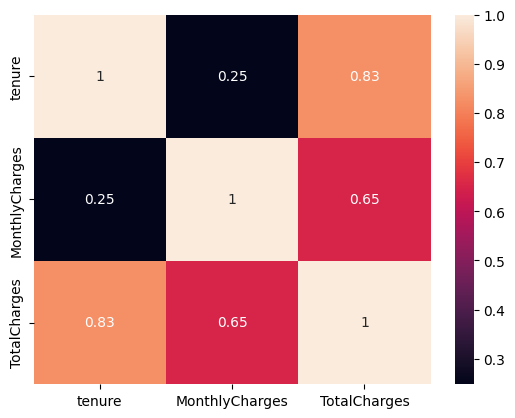

In [467]:
sns.heatmap(numcols.corr(),annot=True)

In [468]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler

In [469]:
scaler=StandardScaler()

In [470]:
numcols_scaled=scaler.fit_transform(numcols)

In [471]:
numcols_scaled=pd.DataFrame(numcols_scaled,columns=numcols.columns)

In [472]:
numcols_scaled.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


In [473]:
from sklearn.preprocessing import MinMaxScaler

In [474]:
minmax=MinMaxScaler()

In [475]:
numcols_minmax=minmax.fit_transform(numcols)

In [476]:
numcols_minmax=pd.DataFrame(numcols_minmax,columns=numcols.columns)

In [477]:
numcols_minmax.head()

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330


In [478]:
objcols.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [479]:
objcols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   object
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   MultipleLines     7043 non-null   object
 6   InternetService   7043 non-null   object
 7   OnlineSecurity    7043 non-null   object
 8   OnlineBackup      7043 non-null   object
 9   DeviceProtection  7043 non-null   object
 10  TechSupport       7043 non-null   object
 11  StreamingTV       7043 non-null   object
 12  StreamingMovies   7043 non-null   object
 13  Contract          7043 non-null   object
 14  PaperlessBilling  7043 non-null   object
 15  PaymentMethod     7043 non-null   object
 16  Churn             7043 non-null   object
dtypes: object(17)


In [480]:
objcols_dummy=pd.get_dummies(objcols,columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'])

In [481]:
objcols_dummy.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,True,False,True,False,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
1,No,False,True,True,False,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
2,Yes,False,True,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,No,False,True,True,False,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,Yes,True,False,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


In [482]:
objcols_dummy.replace({False:0,True:1},inplace=True)

In [483]:
objcols_dummy.head()

,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,1,0,1,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,No,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,Yes,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,No,0,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,Yes,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [484]:
churn_df_final=pd.concat([numcols_minmax,objcols_dummy],axis=1)

In [485]:
y=churn_df_final.Churn
X=churn_df_final.drop('Churn',axis=1)

In [486]:
from sklearn.preprocessing import LabelEncoder

In [487]:
y=LabelEncoder().fit_transform(y)

<Axes: xlabel='Churn'>

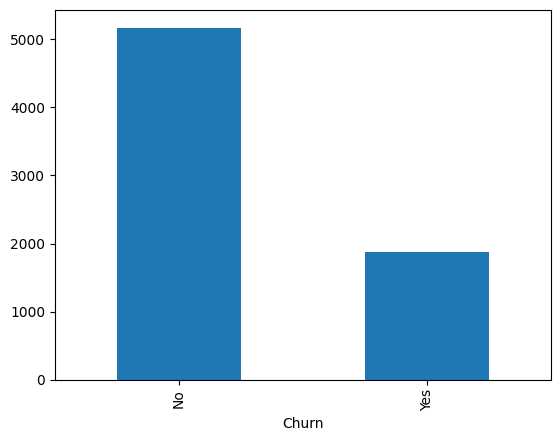

In [488]:
churn.Churn.value_counts().plot(kind="bar")

In [489]:
#That’s a great difference. We have to oversample the minority class. For doing this, 
#I am using SMOTE(Synthetic Minority Over-sampling TechniquE) which makes synthetic data
#using the characteristics of the nearest neighbours. 

### SMOTE

In [490]:
from imblearn.over_sampling import SMOTEN

In [491]:
smote=SMOTEN(random_state=42)

In [492]:
X_smote,y_smote=smote.fit_resample(X,y)

### Logistic Regression

In [493]:
from sklearn.linear_model import LogisticRegression

In [494]:
logit=LogisticRegression(max_iter=2000)

In [495]:
logitmodel=logit.fit(X_smote,y_smote)

In [496]:
logitmodel.score(X_smote,y_smote)

0.8441244684963278

In [497]:
from sklearn.metrics import RocCurveDisplay,classification_report

In [498]:
from sklearn.model_selection import cross_val_score

In [499]:
cross_val_score(logit,X_smote,y_smote)

array([0.72222222, 0.75603865, 0.88115942, 0.89560174, 0.89366844])

In [500]:
np.mean([0.72753623, 0.76570048, 0.86956522, 0.88400193, 0.87820203])

0.8250011780000002

In [501]:
logitpredict=logitmodel.predict(X_smote)

In [502]:
pd.crosstab(y_smote,logitpredict)

col_0,0,1
row_0,,
0,4439,735
1,878,4296


In [503]:
print(classification_report(y_smote,logitpredict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      5174
           1       0.85      0.83      0.84      5174

    accuracy                           0.84     10348
   macro avg       0.84      0.84      0.84     10348
weighted avg       0.84      0.84      0.84     10348



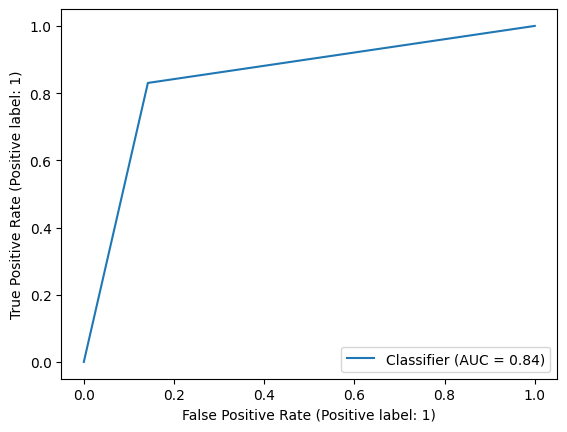

In [504]:
RocCurveDisplay.from_predictions(y_smote,logitpredict)

### Decision Tree

In [505]:
from sklearn.tree import DecisionTreeClassifier

In [506]:
tree=DecisionTreeClassifier(max_depth=8)

In [507]:
treemodel=tree.fit(X_smote,y_smote)

In [508]:
treemodel.score(X_smote,y_smote)

0.8613258600695787

In [509]:
cross_val_score(tree,X_smote,y_smote)

array([0.69951691, 0.74879227, 0.86376812, 0.86950217, 0.89270179])

In [510]:
np.mean([0.69855072, 0.74975845, 0.8647343 , 0.8719188 , 0.89221846])

0.815436146

In [511]:
treepredict=treemodel.predict(X_smote)

In [512]:
pd.crosstab(y_smote,treepredict)

col_0,0,1
row_0,,
0,4316,858
1,577,4597


In [513]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      5174
           1       0.84      0.89      0.86      5174

    accuracy                           0.86     10348
   macro avg       0.86      0.86      0.86     10348
weighted avg       0.86      0.86      0.86     10348



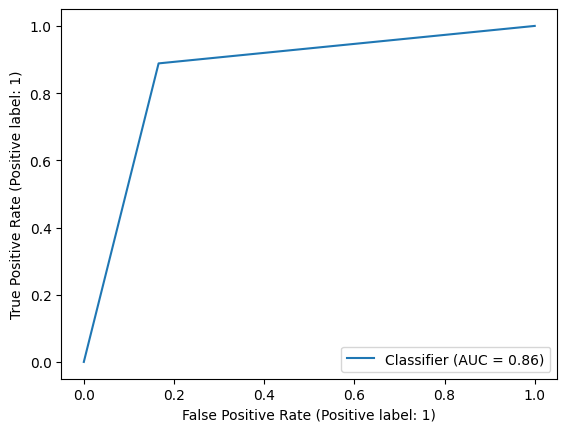

In [514]:
RocCurveDisplay.from_predictions(y_smote,treepredict)

### Random Forest

In [515]:
from sklearn.ensemble import RandomForestClassifier

In [516]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=8)

In [517]:
rfmodel=rf.fit(X_smote,y_smote)

In [518]:
rfmodel.score(X_smote,y_smote)

0.8634518747584075

In [519]:
cross_val_score(rf,X_smote,y_smote)

array([0.75120773, 0.77826087, 0.86570048, 0.87723538, 0.89028516])

In [520]:
np.mean([0.74782609, 0.78067633, 0.86328502, 0.88061866, 0.88883519])

0.8322482579999999

In [521]:
rfpredict=rfmodel.predict(X_smote)

In [522]:
pd.crosstab(y_smote,rfpredict)

col_0,0,1
row_0,,
0,4370,804
1,609,4565


In [523]:
print(classification_report(y_smote,rfpredict))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      5174
           1       0.85      0.88      0.87      5174

    accuracy                           0.86     10348
   macro avg       0.86      0.86      0.86     10348
weighted avg       0.86      0.86      0.86     10348



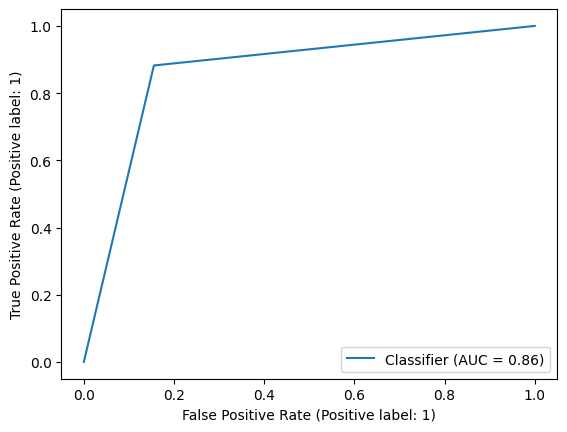

In [524]:
RocCurveDisplay.from_predictions(y_smote,rfpredict)

### Gradient Boosting

In [525]:
from sklearn.ensemble import GradientBoostingClassifier

In [526]:
gbc=GradientBoostingClassifier(n_estimators=500,max_depth=2)

In [527]:
gbcmodel=gbc.fit(X_smote,y_smote)

In [528]:
gbcmodel.score(X_smote,y_smote)

0.8700231928875145

In [529]:
cross_val_score(gbc,X_smote,y_smote)

array([0.72222222, 0.76666667, 0.8942029 , 0.90575157, 0.91348478])

In [530]:
np.mean([0.72222222, 0.76666667, 0.8942029 , 0.90575157, 0.91348478])

0.8404656279999999

In [531]:
gbcpredict=gbcmodel.predict(X_smote)

In [532]:
pd.crosstab(y_smote,gbcpredict)

col_0,0,1
row_0,,
0,4522,652
1,693,4481


In [533]:
print(classification_report(y_smote,gbcpredict))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5174
           1       0.87      0.87      0.87      5174

    accuracy                           0.87     10348
   macro avg       0.87      0.87      0.87     10348
weighted avg       0.87      0.87      0.87     10348



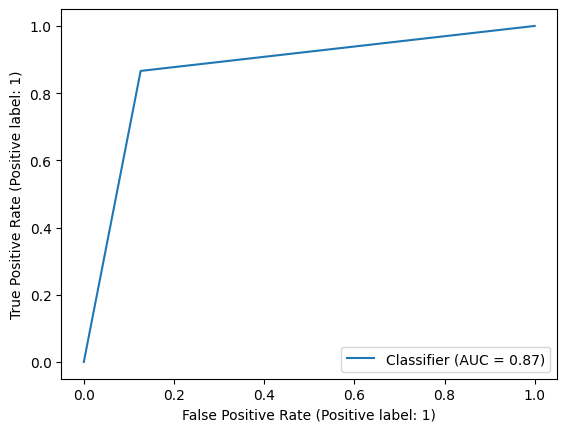

In [534]:
RocCurveDisplay.from_predictions(y_smote,gbcpredict)

### Naive Bayes

In [535]:
from sklearn.naive_bayes import MultinomialNB

In [536]:
mnb=MultinomialNB()

In [537]:
mnbmodel=mnb.fit(X_smote,y_smote)

In [538]:
mnbmodel.score(X_smote,y_smote)

0.7551217626594511

In [539]:
cross_val_score(mnb,X_smote,y_smote)

array([0.75845411, 0.74589372, 0.75120773, 0.75688739, 0.76075399])

In [540]:
np.mean([0.68985507, 0.7057971 , 0.77294686, 0.78153697, 0.77670372])

0.7453679440000001

In [541]:
mnbpredict=mnbmodel.predict(X_smote)

In [542]:
pd.crosstab(y_smote,mnbpredict)

col_0,0,1
row_0,,
0,3381,1793
1,741,4433


In [543]:
print(classification_report(y_smote,mnbpredict))

              precision    recall  f1-score   support

           0       0.82      0.65      0.73      5174
           1       0.71      0.86      0.78      5174

    accuracy                           0.76     10348
   macro avg       0.77      0.76      0.75     10348
weighted avg       0.77      0.76      0.75     10348



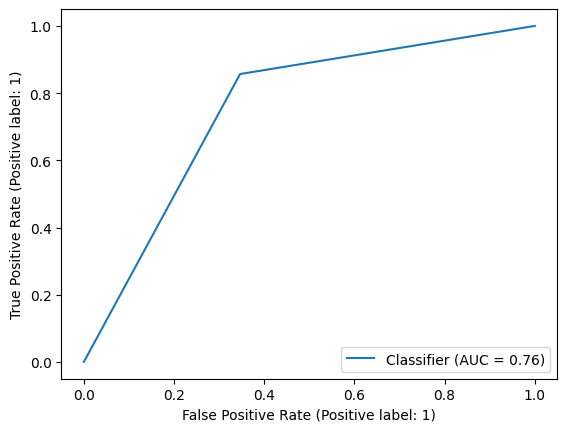

In [544]:
RocCurveDisplay.from_predictions(y_smote,mnbpredict)

### Support Vector Machine

In [545]:
from sklearn.svm import SVC

In [546]:
svc=SVC(C=5)

In [547]:
svcmodel=svc.fit(X_smote,y_smote)

In [548]:
svcmodel.score(X_smote,y_smote)

0.8870313103981445

In [549]:
cross_val_score(svc,X_smote,y_smote)

array([0.69130435, 0.74444444, 0.89855072, 0.91155147, 0.90768487])

In [550]:
np.mean([0.69613527, 0.71352657, 0.78695652, 0.80183664, 0.79603673])

0.758898346

In [551]:
svcpredict=svcmodel.predict(X_smote)

In [552]:
pd.crosstab(y_smote,svcpredict)

col_0,0,1
row_0,,
0,4639,535
1,634,4540


In [553]:
print(classification_report(y_smote,svcpredict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      5174
           1       0.89      0.88      0.89      5174

    accuracy                           0.89     10348
   macro avg       0.89      0.89      0.89     10348
weighted avg       0.89      0.89      0.89     10348



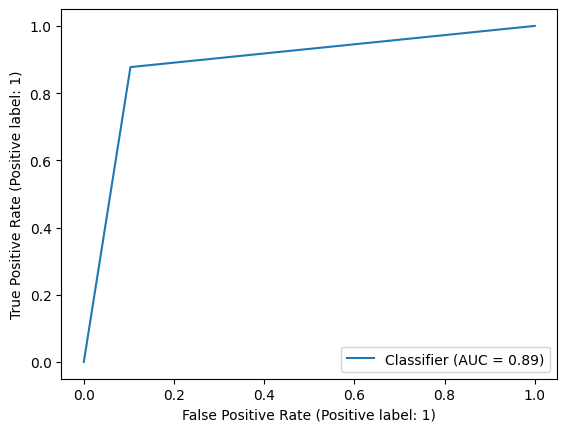

In [554]:
RocCurveDisplay.from_predictions(y_smote,svcpredict)

# Summary

After building and evaluating various machine learning models , we have compiled additional information, including Precision,Recall (Sensitivity),F1-Score,ROC-AUC to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores,Accuracy,ROC-AUC values:

| Model Name | Accuracy | ROC-AUC |
|--|--|--|
| Logistic Regression |  |0.76 |
| Decision Tree |0.8527323494216195 | 0.85|
| Random Forest |0.871779018747507 | 0.87|
| **Gradient Boosting Machine** | **0.8865476665337056** | **0.89**|
| Naive Bayes|0.7006481850817711|0.70|
| Support Vector Machine | 0.7861188671719186 |0.79|

The "Gradient Boosting Machine" model stands out with a significantly higher Accuracy score compared to its counterparts, indicating its superior predictive performance for this dataset. The higher Accuracy value suggests that the Gradient Boosting Machine model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for Classification tasks where Catogorical prediction accuracy is crucial.

In light of these findings, it's advisable to consider theGradient Boosting Machine model as a more reliable option for Classification analysis on the Titanic survival prediction dataset, prioritizing Accuracy as the key performance indicator scores.

# Summary

After building and evaluating various machine learning models for , we have compiled additional information, including Precision,Recall (Sensitivity),F1-Score,ROC-AUC to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores,Accuracy,ROC-AUC values:

| Model Name | Accuracy | ROC-AUC |
|--|--|--|
| Logistic Regression | 0.8441244684963278|0.84 |
| Decision Tree |0.8613258600695787| 0.86|
| Random Forest |0.8634518747584075 | 0.86|
| Gradient Boosting Machine | 0.8700231928875145 | 0.87|
| Naive Bayes|0.7551217626594511|0.76|
| **Support Vector Machine** |**0.8870313103981445**  |**0.89**|

The "Support Vector Machine" model stands out with a significantly higher Accuracy score compared to its counterparts, indicating its superior predictive performance for this dataset. The higher Accuracy value suggests that the Support Vector Machine model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for Classification tasks where Catogorical prediction accuracy is crucial.

In light of these findings, it's advisable to consider the Support Vector Machine model as a more reliable option for Classification analysis on the Teleco Churn prediction dataset, prioritizing Accuracy as the key performance indicator scores.

